# Analyzing USD/PKR Exchange Rate in the Tenure of Shahbaz Sharif

This project was started on 20/03/2023 and the dataset used is downloaded from https://www.investing.com/currencies/usd-pkr-historical-data. The dataset dates the earliest to 11th of April 2021 when Shahbaz Sharif was elected as Prime Minister after the no-confidence motion against Imran Khan. I will perform Exploratory Data Analysis on this dataset to understand and visualize how the USD/PKR exchange rate has fluctuated in these ~2 years since Shahbaz Sharif became PM.



---



## 1. Importing the required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [2]:
df = pd.read_csv("USD_PKR Historical Data.csv")
# To display the top 5 rows 
df.head(5)               

,Date,Price,Open,High,Low,Vol.,Change %
0,02/20/2023,259.88,261.50,262.750,259.88,0.02K,-0.90%
1,02/17/2023,262.24,263.50,266.150,260.50,0.03K,-1.12%
2,02/16/2023,265.22,266.15,266.980,262.25,0.03K,-0.20%
3,02/15/2023,265.75,267.25,267.500,262.75,0.04K,-0.47%
4,02/14/2023,267.00,269.00,269.725,264.50,0.03K,-0.84%


In [3]:
df.tail(5)                        # To display the botton 5 rows

,Date,Price,Open,High,Low,Vol.,Change %
221,04/15/2022,181.50,181.450,182.075,180.975,0.02K,0.48%
222,04/14/2022,180.64,181.875,181.875,180.750,0.03K,-0.34%
223,04/13/2022,181.25,181.850,182.050,181.250,0.02K,-0.20%
224,04/12/2022,181.62,182.950,183.370,181.000,0.03K,-0.66%
225,04/11/2022,182.82,184.600,184.600,182.200,0.03K,-0.64%




---



## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [4]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object



---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the column Volatility is dropped.

In [5]:
df = df.drop(['Vol.'], axis=1)
df.head(5)

,Date,Price,Open,High,Low,Change %
0,02/20/2023,259.88,261.50,262.750,259.88,-0.90%
1,02/17/2023,262.24,263.50,266.150,260.50,-1.12%
2,02/16/2023,265.22,266.15,266.980,262.25,-0.20%
3,02/15/2023,265.75,267.25,267.500,262.75,-0.47%
4,02/14/2023,267.00,269.00,269.725,264.50,-0.84%




---



## 5. Renaming the columns

In this instance, most of the column names are shortened versions of their complete names, so I tweaked their column names. This is a good approach it improves the readability of the data set.

In [6]:
df = df.rename(columns={"Price": "Exchange Rate", "Open": "Opening Price", "High": "Highest Price", "Low": "Lowest Price",})
df.head(5)

,Date,Exchange Rate,Opening Price,Highest Price,Lowest Price,Change %
0,02/20/2023,259.88,261.50,262.750,259.88,-0.90%
1,02/17/2023,262.24,263.50,266.150,260.50,-1.12%
2,02/16/2023,265.22,266.15,266.980,262.25,-0.20%
3,02/15/2023,265.75,267.25,267.500,262.75,-0.47%
4,02/14/2023,267.00,269.00,269.725,264.50,-0.84%




---



## 6. Dropping the duplicate rows

This is often a handy thing to do.

In [7]:
df.shape

(226, 6)

In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 6)


Now let us remove the duplicate data because it's ok to remove them.

In [9]:
df.count()      # Used to count the number of rows

Date             226
Exchange Rate    226
Opening Price    226
Highest Price    226
Lowest Price     226
Change %         226
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [10]:
df = df.drop_duplicates()
df.head(5)

,Date,Exchange Rate,Opening Price,Highest Price,Lowest Price,Change %
0,02/20/2023,259.88,261.50,262.750,259.88,-0.90%
1,02/17/2023,262.24,263.50,266.150,260.50,-1.12%
2,02/16/2023,265.22,266.15,266.980,262.25,-0.20%
3,02/15/2023,265.75,267.25,267.500,262.75,-0.47%
4,02/14/2023,267.00,269.00,269.725,264.50,-0.84%


In [11]:
df.count()

Date             226
Exchange Rate    226
Opening Price    226
Highest Price    226
Lowest Price     226
Change %         226
dtype: int64



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [12]:
print(df.isnull().sum())

Date             0
Exchange Rate    0
Opening Price    0
Highest Price    0
Lowest Price     0
Change %         0
dtype: int64


In [13]:
df = df.dropna()    # Dropping the missing values.
df.count()

Date             226
Exchange Rate    226
Opening Price    226
Highest Price    226
Lowest Price     226
Change %         226
dtype: int64

In [14]:
print(df.isnull().sum())   # After dropping the values

Date             0
Exchange Rate    0
Opening Price    0
Highest Price    0
Lowest Price     0
Change %         0
dtype: int64




---



## 8. Detecting Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

<AxesSubplot:xlabel='Exchange Rate'>

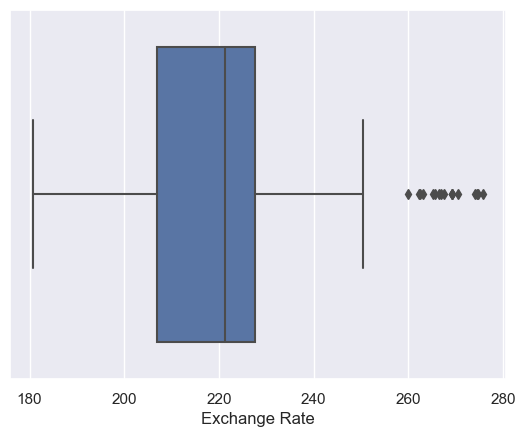

In [17]:
sns.boxplot(x=df['Exchange Rate'])

<AxesSubplot:xlabel='Highest Price'>

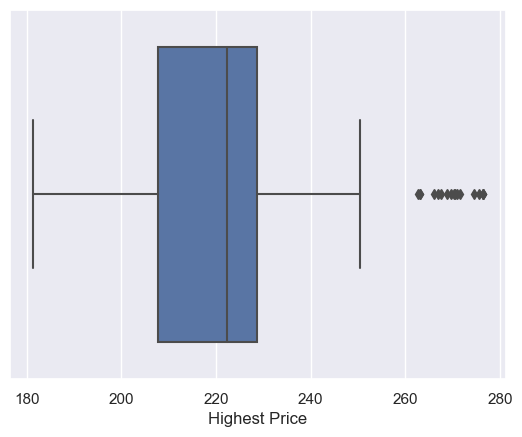

In [18]:
sns.boxplot(x=df['Highest Price'])

<AxesSubplot:xlabel='Lowest Price'>

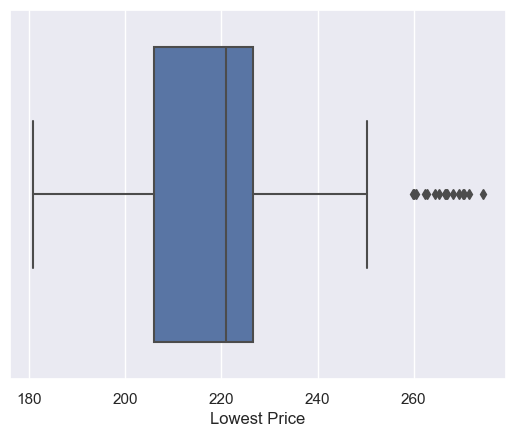

In [19]:
sns.boxplot(x=df['Lowest Price'])

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Exchange Rate    20.72000
Opening Price    20.23625
Highest Price    20.80250
Lowest Price     20.77375
dtype: float64


Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [21]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\My Own\AppData\Local\Temp\ipykernel_8624\4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(209, 6)

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

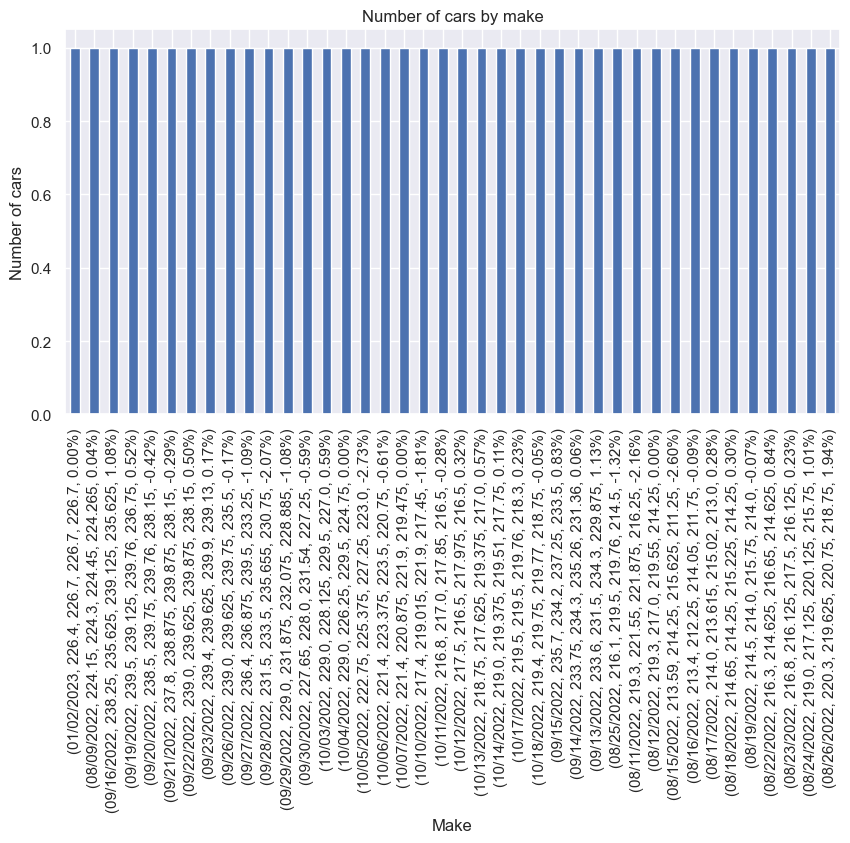

In [24]:
df.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


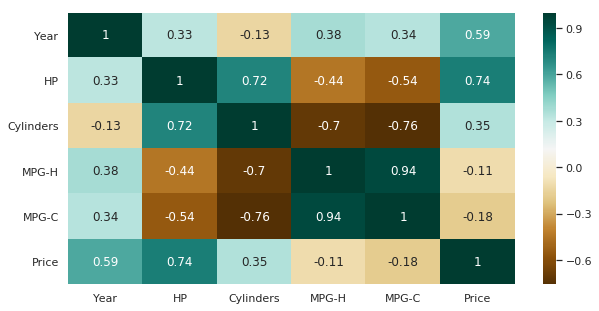

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

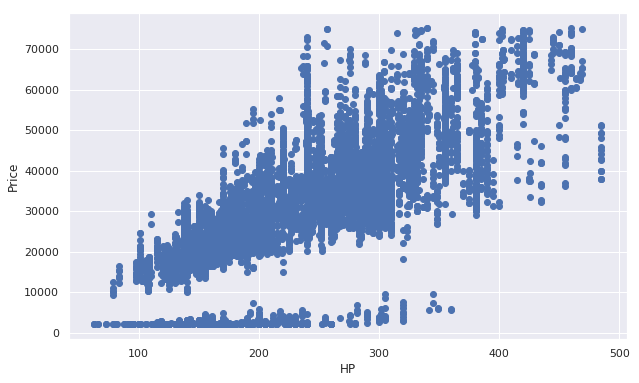

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()